In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
def lake_water_density(temp_C, cond_mS_cm):
    """
    Estimate lake water density based on temperature (°C) and conductivity (mS/cm).
    
    Parameters:
        temp_C: Temperature in °C (scalar or array)
        cond_mS_cm: Conductivity in mS/cm (scalar or array)
    
    Returns:
        Density in kg/m³
    """
    rho_0 = 1000           # Reference density of freshwater at 4°C [kg/m³]
    alpha = 2e-4           # Thermal expansion coefficient [°C⁻¹]
    beta = 0.0             # Salinity influence coefficient
    T0 = 4                # Reference temperature [°C]
    salinity = 0.012 * cond_mS_cm  # Estimate salinity from conductivity [g/kg]
    
    density = rho_0 * (1 - alpha * (temp_C - T0) + beta * salinity / 1000)
    return density

In [3]:
# Create a grid for general density surface
temp_vals = np.linspace(7, 12, 100)        # Temperature range (°C)
cond_vals = np.linspace(0,100, 100)         # Conductivity range (mS/cm)
T, C = np.meshgrid(temp_vals, cond_vals)   # Meshgrid for surface
rho = lake_water_density(T, C)             # Compute density

# Stagecoach Reservoir values
stagecoach_temp = 11.15                             # °C
stagecoach_cond = np.linspace(307, 315, 100) / 1000    # Convert µS/cm to mS/cm
stagecoach_density = lake_water_density(stagecoach_temp, stagecoach_cond)

In [4]:
total_df = pd.read_csv('../GPGN486/BOAT/data/total_df.csv')

KEY_Full = total_df[total_df['Area'] == 'KEY']
# convert to from UTC to datetime to sort by date
KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
#KEY_Full
# make dataframe of keystone from the 18th
KEY_18 = KEY_Full[KEY_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-18').date()]

# make dataframe for all of harding measuremnets
HAR_Full = total_df[total_df['Area'] == 'HAR']
# convert to from UTC to datetime to sort by date
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
#HAR_Full
# make dataframe of harding from the 17th
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

C:\Users\kggin\AppData\Local\Temp\ipykernel_12996\1858621620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
C:\Users\kggin\AppData\Local\Temp\ipykernel_12996\1858621620.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])


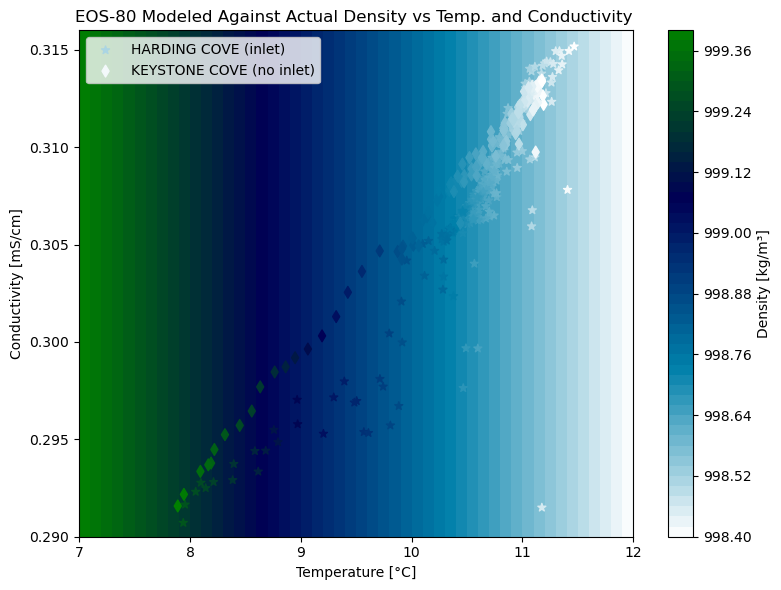

In [20]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(T, C, rho, levels=50, cmap="ocean_r")
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Density [kg/m³]')

# Plot Stagecoach data
ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Conductivity (µS/cm)']/1000, c=HAR_17['Density (kg/m³)'], 
           cmap='ocean_r', label='HARDING COVE (inlet)', marker="*")
ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Conductivity (µS/cm)']/1000, c=KEY_18['Density (kg/m³)'], 
           cmap='ocean_r', label='KEYSTONE COVE (no inlet)', marker='d')

# Labels and legend
ax.set_title('EOS-80 Modeled Against Actual Density vs Temp. and Conductivity ')
ax.set_xlim(7, 12)
ax.set_xlabel('Temperature [°C]')
ax.set_ylim(.29, .316)
ax.set_ylabel('Conductivity [mS/cm]')
ax.legend()
plt.tight_layout()
plt.show()